# ПРОЕКТ: Исследование данных о российском кинопрокате



### Описание проекта
Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

### Цель проекта: 
Изучить данные МинКульта о фильмах в прокате, определить интересные заказчику закономерности в данных о фильмах интересных зрителю.

### Описание данных:
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.\
Обратите внимание, что столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
puNumber — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

### План работы:
* Шаг 1. Откроем файлы с данными и объединим их в один датафрейм
* Шаг 2. Предобработка данных
  * Проверим типы данных в датафрейме и преобразуем там, где это необходимо.
  * Изучим пропуски в датафрейме. Объясним, почему заполнили пропуски определённым образом или почему не стали это делать.
  * Проверим, есть ли в данных дубликаты. Опишим причины, которые могли повлиять на появление дублей.
  * Изучим столбцы, которые содержат категориальные значения:
       * Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
       * Исправим проблемные значения в поле type.
  * Изучим столбцы, которые хранят количественные значения. Проверим, обнаружились ли в таких столбцах подозрительные данные. 
  * Добавим новые столбцы:
       * Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма;
       * Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма;
       * Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.
* Шаг 3. Проведем исследовательский анализ данных
  * Посмотрим, сколько фильмов выходило в прокат каждый год.
  * Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. 
  * Проанализируем, как эта доля менялась по годам.
  * Изучим, как менялась динамика проката по годам.
  * Посчитаем среднюю и медианную сумму сборов для каждого года.
  * Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?
* Шаг 4. Исследуем фильмы, которые получили государственную поддержку
  * Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг. 
* Шаг 5. Напишем общий вывод

## Шаг 1 Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

#### Загрузим данные и библиотеки

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 55)

In [3]:
# КОДРЕВЬЮЕРА
import os
pth1 = '/datasets/mkrf_movies.csv'
pth2 = 'mkrf_movies.csv'
    
if os.path.exists(pth1):
    movies = pd.read_csv(pth1)
elif os.path.exists(pth2):
    movies = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
pth1 = '/datasets/mkrf_shows.csv'
pth2 = 'mkrf_shows.csv'
    
if os.path.exists(pth1):
    shows = pd.read_csv(pth1)
elif os.path.exists(pth2):
    shows = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Проверим данные
Откроем первый датасет *movies*

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
display(movies.sample(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
3841,Однажды в милиции. Серии 21 - 30,211029010,2010-06-30T12:00:00.000Z,Художественный,"ООО ""ВайБиДаблЮ Груп""",Россия,К.Папакуль,"В.Муругов, А.Зюнькин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.8,комедия
4127,The Doors. When You' re Strange,122000710,2010-11-19T12:00:00.000Z,Документальный,Рино Интертейнмент,США,Том Ди Чилло,"Джон Беуг, Питер Янковский, Дик Вульф, Джефф Я...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.0,"документальный,музыка"
5825,Укрась прощальное утро цветами обещания,124001818,2018-04-19T12:00:00.000Z,Анимационный,"Бандай Вижуал, Сигеймс, Хакуходо ДИ мьюзик энд...",Япония,"Мари Окада, Тошия Шиохара",NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"аниме,мультфильм,драма"
3805,Избранные упражнения для похудения,216001310,2010-01-28T12:00:00.000Z,Художественный,"ООО ""Издательство ""Вектор""",Россия,В.Юркус,"ООО ""Издательство ""Вектор""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
4254,Снова ты,221097610,2010-08-18T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Упс Донатс Продакшнз",США,Энди Фикман,"Джон Джей Страус, Эрик Танненбаум, Энди Фикман",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"мелодрама,комедия"


Откроем второй датасет *shows*

In [6]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
display(shows.sample(5))

,puNumber,box_office
2480,121031018,"5,712,897.70"
2705,124001517,"558,049,518.00"
1987,121021316,"208,838,073.60"
1826,121018416,"2,165,614.00"
3034,126003219,"2,255,594.00"


##### Соеденим таблицы
Соединять будем по столбцу *puNumber*, посмотрим, есть ли дубликаты в этих столбцах, тк по идее эти данные для каждого фильма уникальные. Таке необходимо сменить тип столбца на числовой.

In [8]:
print('Количество повторений в столбце puNumber:',movies['puNumber'].duplicated().sum())
display(movies[movies['puNumber'].duplicated(keep=False)])


Количество повторений в столбце puNumber: 2


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310,2010-12-17T12:00:00.000Z,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17T12:00:00.000Z,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410,2010-05-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


Посмотрим, имеются ли такие значения во второй таблице, это важно, тк если значения будут во вторых данных, могут быть проблемы с соединением таблиц

In [9]:
print(shows.query('puNumber == 221154310 or puNumber == 221054410'))

Empty DataFrame
Columns: [puNumber, box_office]
Index: []


Тип данных в столбце puNumber - object, перед тем как преобразовывать его в числовой, проверим столбик на наличие данных записанных не цифрами.

In [10]:
print(movies['puNumber'].sort_values(ascending=False).head(5))

1797          нет
5249    231001111
1011    231001012
3992    226019110
4355    226017410
Name: puNumber, dtype: object


Изменим ячейку с `нет` на 0.

In [11]:
movies.loc[movies['puNumber'] == 'нет', 'puNumber'] = "0"

In [12]:
movies[~movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN


В строке 804 видимо есть пробельные символы. Для их удаления удобно использовать строковый метод .strip().

In [13]:
movies.loc[804, 'puNumber'] = movies.loc[804, 'puNumber'].strip()

movies['puNumber'] = pd.to_numeric(movies['puNumber'])
movies['puNumber'].dtype

dtype('int64')

После того как мы убедились, что типы данных в обоих датафреймах совпадают, мы можем дополнить датафрейм с фильмами информацией о показах. Датафрейм df_mkrf_shows теперь нам не требуется.

In [14]:
df = movies.merge(shows, how='left')
del shows

#### Вывод:
##### Необходимые преобразования типов:

* puNumber должен быть переведен в числовой тип из объектного;
* show_start_date должен быть переведен в тип datetime;
* Необходимые корректировки:

* В типе фильма есть повторяющиеся значения, но некоторые из них содержат лишний пробел в начале названия;
* В значениях столбца puNumber есть лишние пробелы;
##### Присутствуют пропуски:

* В film_studio обнаружено 18 пропусков;
* В production_country всего 2 пропуска, эти фильмы из России;
* В director найдено 9 пропусков;
* В producer - 568 пропусков;
* Большое количество данных пропущено в столбцах refundable_support, nonrefundable_support, budget financing_source. Однако в описании указано, что эти данные представлены только для фильмов, которые получили государственную поддержку. Кроме того, бюджет этих фильмов указан с учетом государственной поддержки;
* Пропуски обнаружены в столбцах genres и ratings.
* В датасете movies в основном представлены столбцы с категориальными переменными, среди количественных переменных только refundable_support, nonrefundable_support, budget.

## Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных


* Переведем show_start_date в тип datetime


In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Проверим столбец `raiting`

In [17]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В колонке с рейтингом встречаются странные значения, почему-то рейтинг указан в %. Исходя из имеющихся данных, баллы представлены в 10ти бальной системе. от 1.0 до - 9.2 . Таким образом рейтинг представленный в % может представлять из себя процент от максимального числа 10 в оценке, а может означять кол-во оценок, которые необходимы для составления рейтинга. В любом случае, гадать не вижу смысла, лучше заменить эти значения на NaN

In [18]:
percents = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']


In [19]:
df.query('ratings in @percents').sort_values(by='ratings').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,"37,960.00"
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,"182,882.50"


In [20]:
df.loc[df['ratings'].isin(percents), 'ratings'] = np.nan

In [21]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [22]:
df['ratings'] = pd.to_numeric(df['ratings'])

In [23]:
df['ratings'].dtype

dtype('float64')

##### Вывод:
* Перевели значения столбца show_start_date в тип datetime;
* Перезаписали значения столбца ratings в corrected_ratings, перевели значения в тип float64, значения в процентах привели к NaN

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

##### Проверим пропуски в данных

In [24]:
pd.DataFrame(round(movies.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Text(0.5, 1.0, 'Карта пропусков в данных')

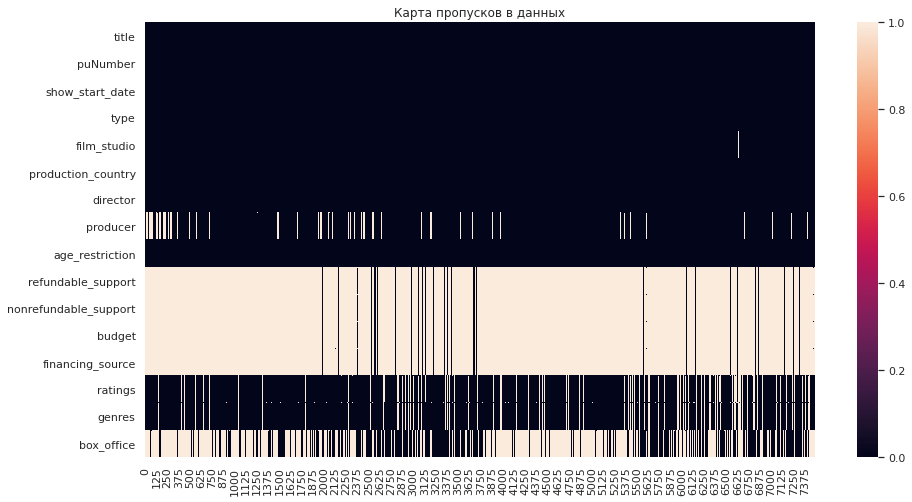

In [25]:
df_na = df.isna()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_na.transpose(), cbar=True).set_title('Карта пропусков в данных')

Проверим зависимость пропущенных данных от года:

In [26]:
df_na['year'] = df['show_start_date'].dt.year
df_na['total_records'] = True
df_na.groupby(by='year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


Кажется, число пропусков не сильно коррелирует с годом.

На тепловой диаграмме видно, что пропуски в колонках refundable_support, nonrefundable_support, budget, financing_source совпадают по расположению. Это также подтверждается матрицей распределения пропусков по годам. Учитывая, что эти данные включают информацию о объеме государственной поддержки, можно предположить, что наличие пропусков, скорее всего, связано со страной происхождения фильма.

In [27]:
df_na = df.budget.isna().rename('is_na').to_frame()

df_na['ru'] = df.production_country.str.contains('Россия')

display(df_na.groupby(['is_na']).agg(['sum', 'count']).set_axis(['Россия', 'Всего'], axis=1))

,Россия,Всего
is_na,,
False,332,332
True,1653,7152


Данные о государственной поддержке доступны только для фильмов, произведенных в России, но большая часть российских фильмов не содержит информацию о государственной поддержке. Вполне возможно, что большинство из них было снято без финансовой помощи от государства.

In [28]:
df_na = pd.DataFrame()
df_na['na_percent'] = df.isnull().sum()/len(df) * 100
df_na['na_count'] =  df.isnull().sum()
df_na['df_lenght']  = len(df)
df_na = df_na[df_na['na_count'] > 0] # убедимся что вывод будет содержать только строки столбцы с пропусками.
display(df_na.sort_values(by='na_percent',ascending=False).head(20))


,na_percent,na_count,df_lenght
refundable_support,95.57,7154,7486
nonrefundable_support,95.57,7154,7486
budget,95.57,7154,7486
financing_source,95.57,7154,7486
box_office,57.81,4328,7486
ratings,13.30,996,7486
genres,13.04,976,7486
producer,7.59,568,7486
film_studio,0.24,18,7486
director,0.12,9,7486


##### Таким образом: 
* В колонке film_studio обнаружено 18 пропусков;
* Отсутствуют данные в колонке production_country для двух фильмов;
* В колонке director имеется 9 пропусков;
* Более значительное количество пропусков - 568 - наблюдается в колонке producer;
* Очень много пропущенных значений в колонках refundable_support, nonrefundable_support, budget, financing_source. Однако, как указывается в описании, эти данные приведены только для тех фильмов, которые получили государственную поддержку, и бюджет этих фильмов рассчитан с учетом этой поддержки;
* Имеются пропуски в колонках genres и ratings.

#### Приступим к заполнению пропусков
##### Столбец `film_studio`

In [29]:
display((df[df['film_studio'].isna() == True]).head(18))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Видим, что в этом столбце преобладает авторское кино. Скорее всего здесь нет никакой ошибки. Кино спонсировала не студия-производитель, а сами авторы (продюсер, режиссер). Таким образом, оставим все как есть.

##### Пропуски в `production_country`.

In [30]:
df.loc[df['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Всего 2 пропуска, по информации из интернета - страна производства - Россия. Заполним пропуски вручну.

In [31]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Россия'

##### Пропуски в `director`. 

In [32]:
df.loc[df['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


##### Вывод: 
Большинство пропущенных значений не может быть заполнено, но это не особо критично и не повлияет на дальнейший ход исследования.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [33]:
print('Явных дубликатов в данных:',df.duplicated().sum())
df.nunique()

Явных дубликатов в данных: 0


title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    80
genres                    742
box_office               2938
dtype: int64

Повторы в title объясняются тем, что один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.

In [34]:
df[['title', 'show_start_date', 'film_studio']].loc[df['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,show_start_date,film_studio
4505,Я ненавижу день святого Валентина,2010-12-03 12:00:00+00:00,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С..."
1704,"Я, снова я и мама",2013-11-21 12:00:00+00:00,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь..."
1703,"Я, снова я и мама",2016-05-23 12:00:00+00:00,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь..."
6379,Ян Антонышев,2018-11-15 12:00:00+00:00,NaN
6380,Ян Антонышев,2018-11-15 12:00:00+00:00,NaN


##### Вывод: 
Нет полностью идентичных строк. Однако есть дубликаты названий фильмов, которые объясняются повторной выдачей прокатных удостоверений. Нельзя это исправить, поскольку при этом будет потерян уникальный номер прокатного удостоверения. Существуют также дубликаты в номерах прокатных удостоверений, вероятно, это связано с тем, что под одним номером было выпущено несколько фильмов. Возможно, эти фильмы демонстрировались вместе. По крайней мере, в официальном реестре так и указано: два фильма под одним номером.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

##### Столбец `type`

In [35]:
df['type'] = df['type'].str.strip()
df['age_restriction'] = df['age_restriction'].str.strip()
df['director'] = df['director'].str.strip()
df['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [36]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [37]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [38]:
df['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

##### Вывод:

Мы исправили проблему с лишними пробелами в колонке `type`. Практически все категориальные переменные содержат комбинированные значения, например, "драма,триллер" или "драма,военный". Этот факт мы не можем изменить.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [40]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [41]:
quant_values = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']

df[quant_values].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.00,332.00,332.00,"3,158.00","6,490.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16",6.48
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82",1.10
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,"25,000,000.00","42,000,000.00","86,239.00",5.90
50%,0.00,"30,000,000.00","68,649,916.00","2,327,987.55",6.60
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02",7.20
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",9.20


Из преведенных виде метрик ясно - есть фильмы с бюджетом равным 0, как такое может быть посмотрим далее:

In [42]:
df.loc[:, df.columns != 'puNumber'][df['budget'] == 0].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,16.00,17.00
mean,"16,705,882.35","65,174,674.41",0.00,5.72,"163,137,294.43"
std,"20,064,784.78","61,236,204.09",0.00,0.92,"251,115,991.43"
min,0.00,0.00,0.00,4.30,"1,334,699.40"
25%,0.00,"23,000,000.00",0.00,5.07,"50,451,949.00"
50%,"10,000,000.00","51,000,000.00",0.00,5.70,"72,937,783.20"
75%,"20,000,000.00","75,000,000.00",0.00,6.30,"184,487,551.40"
max,"60,000,000.00","250,000,000.00",0.00,7.80,"1,038,321,489.00"


Хоть бюджет некоторых картин равен 0, сумма выделяемых средств в рамках поддержки не нулевая. Таким образом, бюджет не может быть меньше суммы поддержки.
Посмотрим еще на такие строки и исправим проблему.

In [43]:
print('Таких картин:',len(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]))
display(df[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']].head(4))

Таких картин: 17


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"


Напишем функцию, для исправления этого недочета.

In [44]:
def budget_func(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [45]:
df['budget'] = df.apply(budget_func, axis=1)

In [46]:
df[quant_values].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.00,332.00,332.00,"3,158.00","6,490.00"
mean,"11,864,457.83","48,980,988.89","131,422,395.80","76,478,696.16",6.48
std,"24,916,555.26","59,980,117.92","187,148,242.67","240,353,122.82",1.10
min,0.00,0.00,"6,000,000.00",0.00,1.00
25%,0.00,"25,000,000.00","45,524,799.50","86,239.00",5.90
50%,0.00,"30,000,000.00","71,196,901.50","2,327,987.55",6.60
75%,"15,000,000.00","40,375,000.00","150,000,000.00","23,979,671.02",7.20
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",9.20


##### Вывод:
Были исправлены пропуски в колонке с бюджетом, теперь минимальный бюджет не 0.0 а 6 000 000.00

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [47]:
df['show_start_year'] = df['show_start_date'].dt.year

In [48]:
df['show_start_year'].sample(10)

4864    2011
3365    2016
7209    2019
130     2014
5941    2018
1072    2012
1540    2014
1609    2014
5177    2011
271     2014
Name: show_start_year, dtype: int64

In [49]:
df['show_start_year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [50]:
def main_func(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(',')[0])
    return df

In [51]:
df = main_func(df, ['director', 'genres'])

In [52]:
df[['main_director','main_genres']].sample(5)

,main_director,main_genres
3713,Тимур Бекмамбетов,боевик
2009,А.Ягубец,драма
6495,О.Аверкиева,NaN
2826,Л.Трофимова,NaN
6643,А.Богданов,NaN


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
df['help_percent'] = round((df['refundable_support'] + df['nonrefundable_support']) / df['budget'], 2)

In [54]:
df[['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings', 'help_percent']].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings,help_percent
count,332.00,332.00,332.00,"3,158.00","6,490.00",332.00
mean,"11,864,457.83","48,980,988.89","131,422,395.80","76,478,696.16",6.48,0.54
std,"24,916,555.26","59,980,117.92","187,148,242.67","240,353,122.82",1.10,0.20
min,0.00,0.00,"6,000,000.00",0.00,1.00,0.04
25%,0.00,"25,000,000.00","45,524,799.50","86,239.00",5.90,0.38
50%,0.00,"30,000,000.00","71,196,901.50","2,327,987.55",6.60,0.61
75%,"15,000,000.00","40,375,000.00","150,000,000.00","23,979,671.02",7.20,0.66
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",9.20,1.00


##### Вывод:
* Добавили столбец с годом проката фильмов;
* Добавили столбцы содержащие имя и фамилию главного режисера и основной жанр соответственно.
* Также добавили столбец содержащий информацию о процентном соотношении покрития бюджета фильма поддержкой от государства.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [55]:
df_pivot = df.loc[df['box_office'].notna(), ['show_start_year', 'box_office']] \
                .groupby('show_start_year') \
                .agg(['count', 'sum', 'mean', 'median'])
df_pivot.columns = df_pivot.columns.get_level_values(1)

Доля фильмов, для которых есть информация о сборах: 0.42


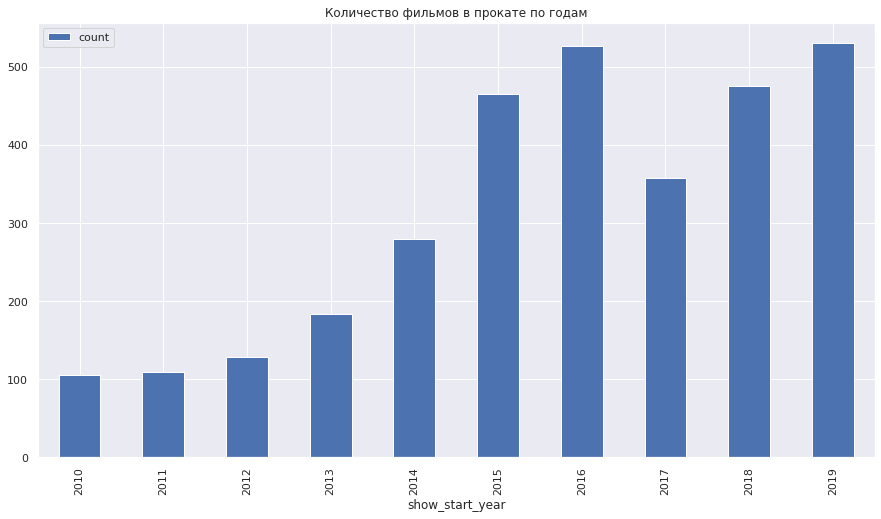

In [56]:
df_pivot.plot(title='Количество фильмов в прокате по годам', kind='bar', y='count')
print(f'Доля фильмов, для которых есть информация о сборах: {df.box_office.notna().mean():.2f}')

In [57]:
cinema_part = (df[['show_start_year','box_office']].groupby(
    'show_start_year'
    ).apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame(
    ).reset_index()
print(cinema_part)

   show_start_year     0
0             2010 10.66
1             2011 17.52
2             2012 21.59
3             2013 29.21
4             2014 34.57
5             2015 65.96
6             2016 64.30
7             2017 70.69
8             2018 53.31
9             2019 56.99


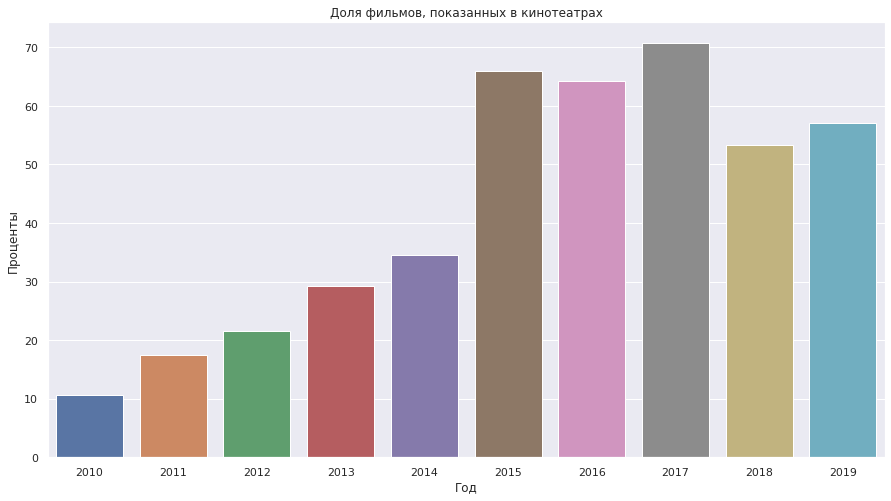

In [58]:
sns.barplot(x='show_start_year', y=0, data=cinema_part);
plt.title('Доля фильмов, показанных в кинотеатрах');
plt.xlabel('Год');
plt.ylabel('Проценты');

##### Вывод: 
В таблице меньше всего данных по фильмам с 2010 - 2014 год, поэтому нельзя явно сказать, что фильмы в этот период меньше выходили в кинотеатрах, просто о них мало данных. \
На графиках видно, что больше всего фильмов в кинотеатрах показывали в 2019, хотя доля в выборке таких фильмов не самая большая, больше всего данных по фильмам 2017 года.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:title={'center':'Сборы фильмов в прокате по годам'}, xlabel='show_start_year'>

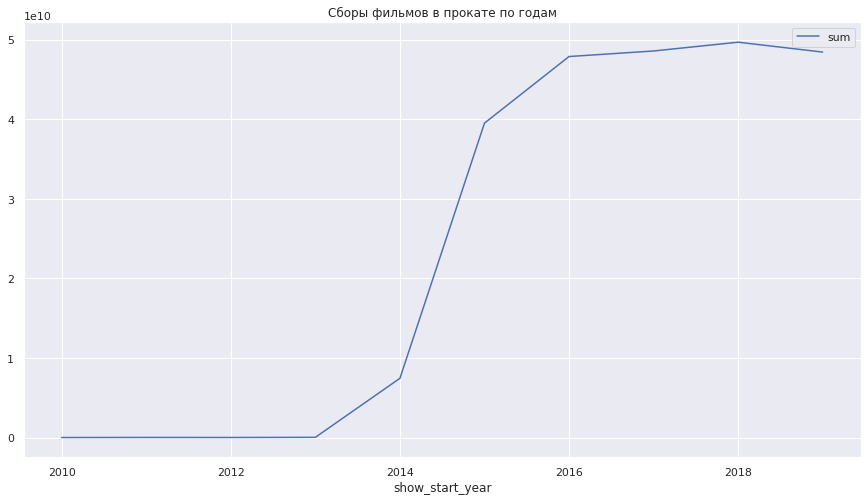

In [59]:
df_pivot.plot(title='Сборы фильмов в прокате по годам', kind='line', y='sum')

In [60]:
display(df_pivot['sum'].sort_values(ascending=False))

show_start_year
2018   49,668,403,134.32
2017   48,563,707,217.51
2019   48,425,708,779.59
2016   47,866,299,741.91
2015   39,497,365,196.40
2014    7,444,951,859.20
2013       29,799,706.20
2011       14,102,765.00
2012        6,955,423.00
2010        2,428,654.00
Name: sum, dtype: float64

##### Вывод:
Максимальная сумма сборов фильмов в прокате - 2018 год, а минимальная в 2010. Но, опять же, выборка неоднородна и нельзя сказать что фильмы с 2010 по 2014 собрали суммарно меньше денег, по ним просто недостаточно данных о сборах.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

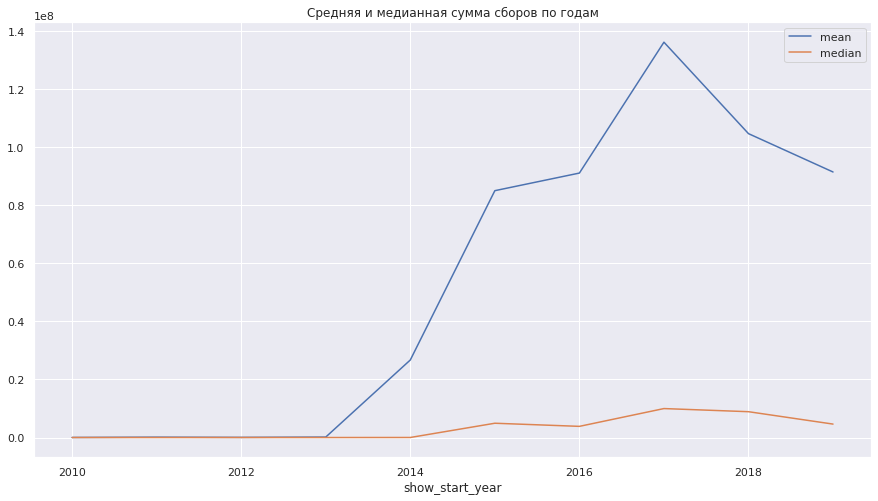

In [61]:
df_pivot.plot(title='Средняя и медианная сумма сборов по годам', kind='line', y=['mean', 'median'])
print()

In [62]:
display(df_pivot[['mean', 'median']].sort_values(by='mean' ,ascending=False))

,mean,median
show_start_year,,
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"
2019,"91,369,261.85","4,627,798.34"
2016,"91,000,569.85","3,846,679.41"
2015,"84,940,570.31","4,920,933.00"
2014,"26,684,415.27","18,160.00"
2013,"161,954.92","3,522.50"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"


##### Вывод:
В данных слишком разброс между средним и медианой. Это случается потому, что среднее очень чувствительно к выбросам, слишком большим и малым значениям в выборке. Очевидно, что для мира кино - это нормально, что некоторые картины собирают слишком много, а какие-то ничего.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [63]:
df_age = df[df['box_office'].notna()] \
    .pivot_table(index='show_start_year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum')

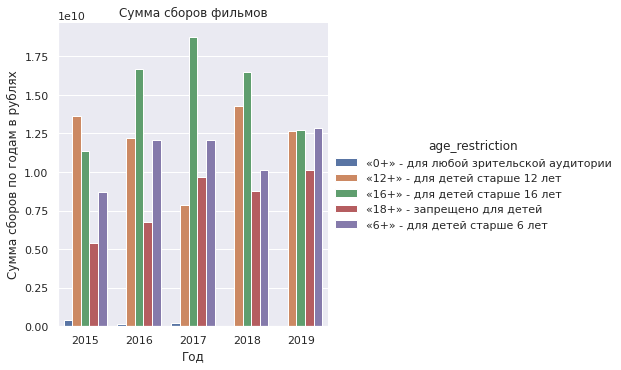

In [64]:
df_age = df.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()
sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=df_age, kind='bar');
plt.title('Сумма сборов фильмов');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам в рублях');

##### Вывод:
Больше всего сборов приносят фильмы категории 16+, одако, такое первенство наблюдается не во все года.
А в 2019 году фильмы всех категорий (за исключением 0+) собрали почти одинаково, это может быть связано с тем, что категоризация и выдача прокатных рейтингов стала строже и теперь не все фильмы можно сделать 16+.

#### Вывод:
* Мы узнали, что у нас очень мало данных о фильмах с 2010 по 2014;
* Медиана и среднее сборов фильмов по годам очень разнятся. Но для киноиндустрии это нормально;
* В целом, рейтинг не особо влияет на сборы, особенно это наблюдается в 2019 году, когда фильмы почти всех категорий собрали одинково.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для начала создадим новую таблицу, куда попадут фильмы с гос поддержкой.
Также создадим новые столбцы, которые помогут нам в анализе:
* `full_support` - сумма общей возвращаемой и невозвращаемой поддержки;
* `profit` - процент окупаемости;
* `is_paid_off` и `is_not_paid_off` - булевой параметр окупился фильм или нет, нужен для построения графиков;
* `payback` - чистая прибыль или потери.

In [65]:
df_supp = df[df['refundable_support'].notna() | df['nonrefundable_support'].notna()]

df_supp['full_support'] = df_supp['nonrefundable_support'] + df_supp['refundable_support']

df_supp['profit'] = round(df_supp['box_office'] / df_supp['full_support'] - 1,3)

df_supp['payback'] = round(df_supp['box_office'] - df_supp['budget'], 2)

df_supp['is_paid_off'] = df_supp['profit'] > 0

df_supp['is_not_paid_off'] = ~df_supp['is_paid_off']

/tmp/ipykernel_123/2142465351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['full_support'] = df_supp['nonrefundable_support'] + df_supp['refundable_support']
/tmp/ipykernel_123/2142465351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_supp['profit'] = round(df_supp['box_office'] / df_supp['full_support'] - 1,3)
/tmp/ipykernel_123/2142465351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [66]:
df_supp.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,show_start_year,main_director,main_genres,help_percent,full_support,profit,payback,is_paid_off,is_not_paid_off
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"365,353.60",2013,А.Атанесян,драма,0.33,"26,500,000.00",-0.99,"-79,046,546.40",False,True
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"28,140.00",2014,А.Якимчук,NaN,0.70,"26,000,000.00",-1.00,"-37,114,717.00",False,True
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"19,957,031.50",2013,Р.Давлетьяров,комедия,0.61,"107,847,945.00",-0.81,"-156,066,458.50",False,True
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,"28,000,000.00",-1.00,"-40,518,222.50",False,True
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"232,100.00",2014,М.Угаров,драма,0.62,"25,000,000.00",-0.99,"-39,783,022.00",False,True


<AxesSubplot:title={'center':'Средняя оценка фильмов по жанрам'}, xlabel='Жанры'>

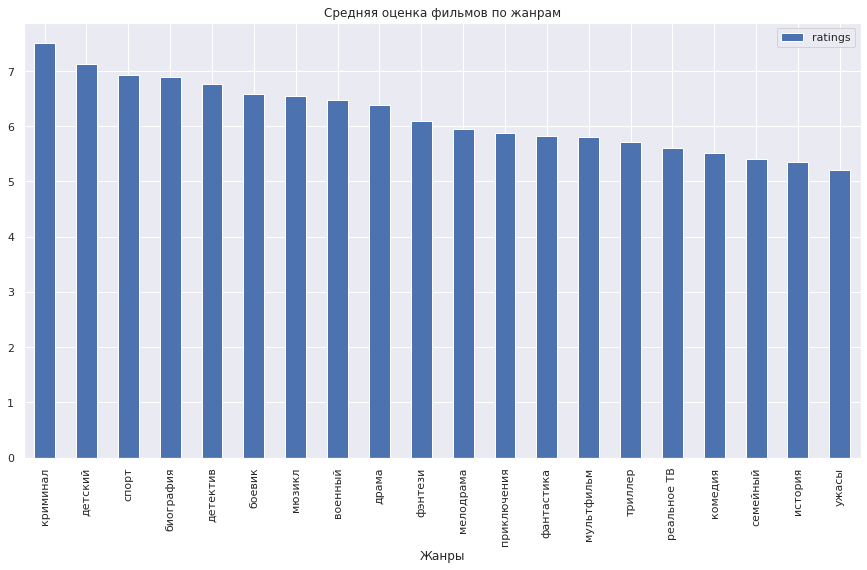

In [67]:
df_supp[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='Средняя оценка фильмов по жанрам', 
                                        kind='bar',
                                        xlabel='Жанры')

<AxesSubplot:title={'center':'Количество фильмов, получивших господдержку (по жанрам)'}>

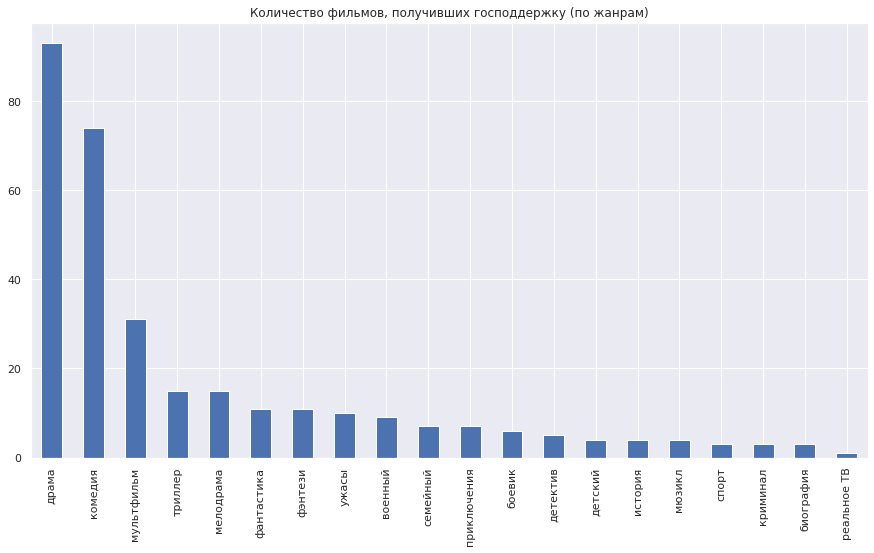

In [68]:
df_supp['main_genres'].value_counts().plot(title='Количество фильмов, получивших господдержку (по жанрам)', kind='bar')

Из графика видно, больше всего поддержки получили фильмы из жанра драмы, комедии, а также мультфильмы.

<AxesSubplot:title={'center':'Количество окупившихся и не окупившихся фильмов'}, xlabel='Жанры', ylabel='Кол-во фильмов'>

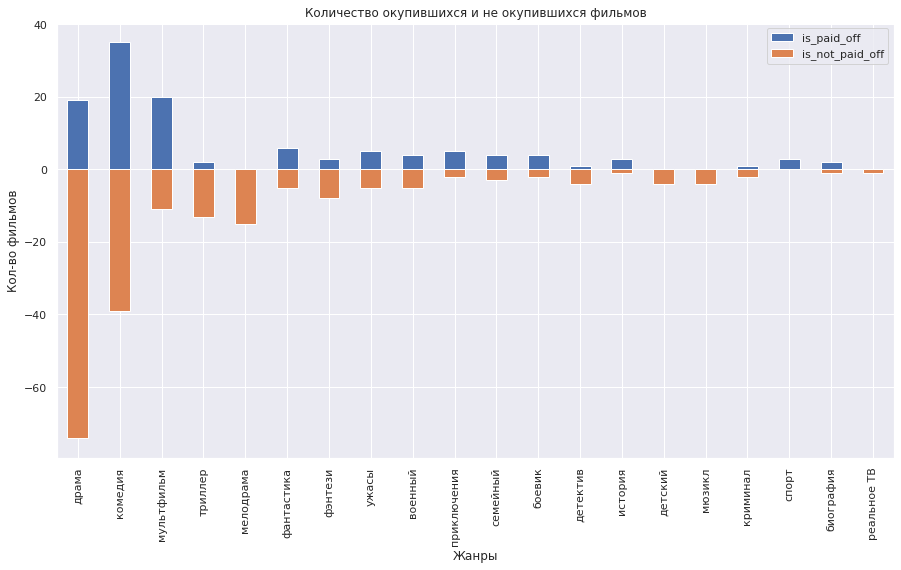

In [69]:
df_supp.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='Количество окупившихся и не окупившихся фильмов',
                  xlabel='Жанры',
                  ylabel='Кол-во фильмов',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'])

Из графика видно, что болшая часть фильмов практически не окупается, из трех перечисленных выше жанров окупаемость показывают только мультфильмы.

<AxesSubplot:title={'center':'Объём государственной поддержки'}, xlabel='main_genres'>

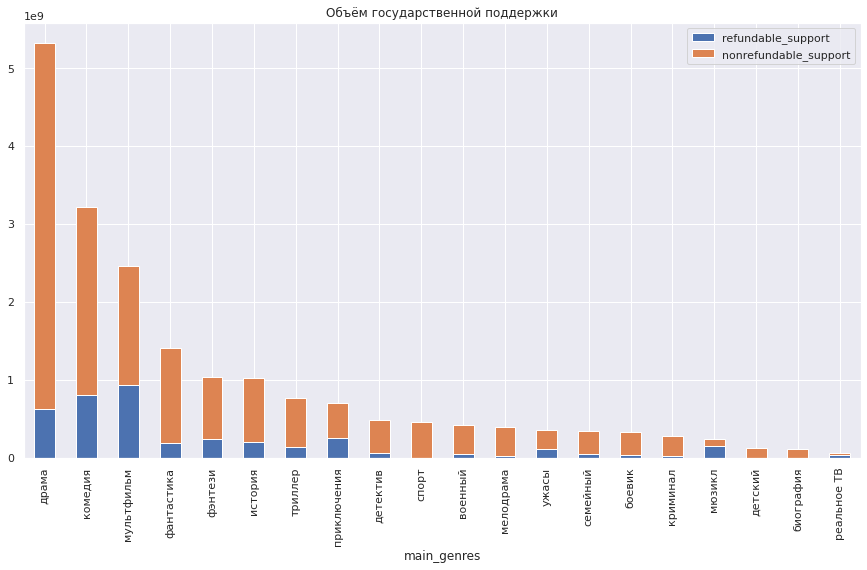

In [70]:
df_supp.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'])

In [71]:
df_supp.loc[:, df_supp.columns != 'puNumber'].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,help_percent,full_support,profit,payback
count,332.00,332.00,332.00,314.00,318.00,332.00,332.00,332.00,318.00,318.00
mean,"11,864,457.83","48,980,988.89","131,422,395.80",6.00,"132,432,420.05","2,016.72",0.54,"60,845,446.72",0.88,"425,697.96"
std,"24,916,555.26","59,980,117.92","187,148,242.67",1.12,"334,837,856.99",1.64,0.20,"72,755,459.47",4.32,"315,910,432.27"
min,0.00,0.00,"6,000,000.00",1.00,"1,550.00","2,013.00",0.04,"3,000,000.00",-1.00,"-1,971,477,243.41"
25%,0.00,"25,000,000.00","45,524,799.50",5.30,"1,236,675.50","2,015.00",0.38,"25,333,750.00",-0.96,"-70,694,429.75"
50%,0.00,"30,000,000.00","71,196,901.50",6.20,"15,720,067.71","2,017.00",0.61,"35,000,000.00",-0.56,"-40,680,816.25"
75%,"15,000,000.00","40,375,000.00","150,000,000.00",6.70,"106,373,008.27","2,018.00",0.66,"60,000,000.00",0.72,"-2,362,182.19"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",8.50,"3,073,568,690.79","2,019.00",1.00,"500,000,000.00",50.23,"2,913,568,690.79"


Из графика и таблицы видно, что доля государственной поддержки доминирует в производстве фильмов разных жанров, если фильм снимается с государственной поддержкой - скорее всего больше половины бюджето сформировано из государственных средств. Видим, что соотношение гос. поддержки к бюджету в среднем 55%. То есть, в среднем половина бюджета - гос. поддержка. Также интересно, что "в среднем" фильмы имеют чистую прибыль в 425 тыс. рублей, но по таблице больше 75% фильмов убыточно. Об этом говорит отрицательное значение квантиле 75. Такой огромный разброс говорит о том, что в данных есть хиты, которые бьют рекорды по сборам.

Посмотрим как распределяются данные о фильмах с гос. поддержкой по годам:

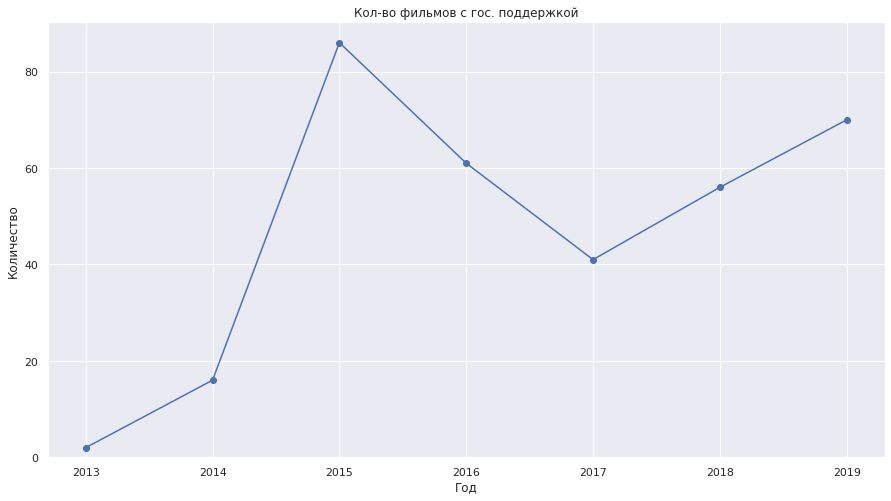

In [72]:
df_supp.groupby('show_start_year')['full_support'].count().plot(ylim=0, grid=True, style='o-');
plt.title('Кол-во фильмов с гос. поддержкой');
plt.xlabel('Год');
plt.ylabel('Количество');

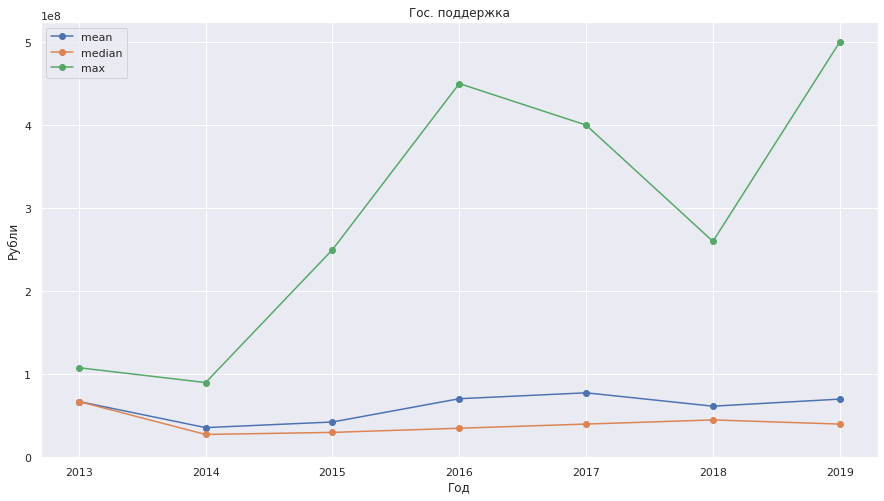

In [73]:
df_supp.groupby('show_start_year')['full_support'].agg(
    ['mean', 'median', 'max']).plot(grid=True, ylim=0, style='o-');
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

В принципе медиана и среднее схожи, единственное можно отметить, что есть фильмы с огромным числом государственных средств.

Посмотрим на зависимости рейтинга от поддержки:

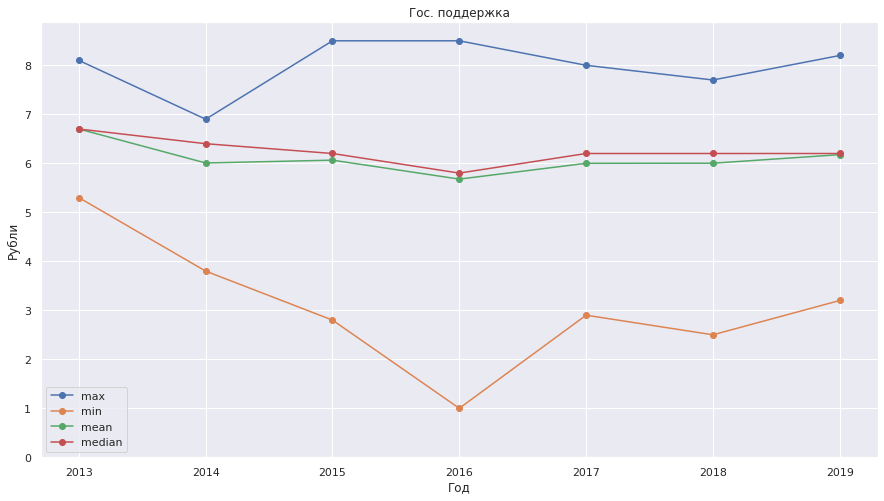

In [74]:
df_supp.groupby('show_start_year')['ratings'].agg(
    ['max', 'min', 'mean', 'median']).plot(grid=True, ylim=0, style='o-')
plt.title('Гос. поддержка');
plt.xlabel('Год');
plt.ylabel('Рубли');

В 2016 году мы наблюдали наименьшую медиану рейтинга, около 1 балла, что делает этот год самым неблагоприятным в этом отношении. Согласно среднему значению, этот год также выделяется "провалом" по сравнению с другими. Остальные года не демонстрируют значительных колебаний в рейтинге. Максимальная поддержка была оказана в 2019 году, в то время как минимальная - в 2017 году. Фильм с самым высоким рейтингом был выпущен в 2016 году, который, кстати, занимает второе место по общему объему поддержки. Рассматривая средний размер поддержки на каждый фильм, 2017 год оказывается на первом месте, в то время как 2018 год - по медиане.

<AxesSubplot:>

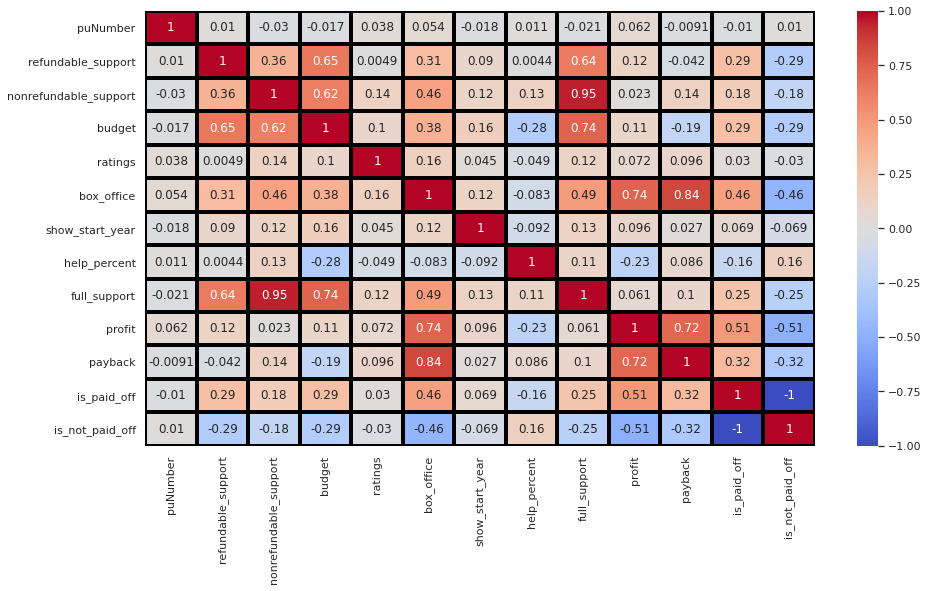

In [75]:
sns.heatmap(
    df_supp.corr(), annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',
)

На диаграмме корреляции видно, что объем помощи сильно коррелирует с бюджетом (что естесственно). Рейтинг же не находиться в зависимости от бюджета и объемов гос поддержки.

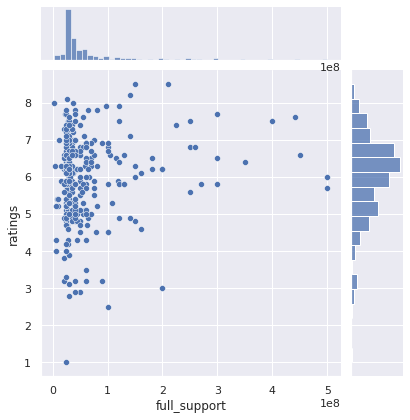

In [76]:
sns.jointplot(data=df_supp, x='full_support', y='ratings', kind='scatter');

В нашей выборке большинство фильмов получили поддержку до 100 миллионов рублей. Интересно, что в среднем фильмы с поддержкой более 200 миллионов рублей имеют рейтинг не менее 5 баллов. Однако даже самые дорогостоящие проекты не могут похвастаться рейтингом более 8 баллов.

В ходе работы мы добавили в данные столбец `main_director`, который обозначает главного режиссера фильма. Давайте посмотрим, какие режиссеры получают наибольшую поддержку от государства, какие они снимают фильмы и окупаются ли они.

In [77]:
df_director = df_supp.groupby('main_director')['full_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])
df_director.columns = ['_'.join(col).strip() for col in df_director.columns.values]
df_director.sort_values(by='full_support_sum', ascending=False).head(10)

/tmp/ipykernel_123/1185228084.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_director = df_supp.groupby('main_director')['full_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])


,full_support_count,full_support_sum,full_support_mean,full_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
main_director,,,,,,,,,,,,
Ф.Бондарчук,2,"750,000,000.00","375,000,000.00","375,000,000.00",1,"788,321,489.00","788,321,489.00","788,321,489.00",2,11.30,5.65,5.65
Н.Хомерики,3,"660,000,000.00","220,000,000.00","300,000,000.00",3,"-325,561,715.77","-108,520,571.92","-92,930,337.20",3,18.10,6.03,5.80
А.Кравчук,1,"500,000,000.00","500,000,000.00","500,000,000.00",1,"-262,296,814.47","-262,296,814.47","-262,296,814.47",1,6.00,6.00,6.00
Р.Давлетьяров,5,"459,847,945.00","91,969,589.00","97,000,000.00",5,"-471,167,304.56","-94,233,460.91","-105,278,859.98",5,33.90,6.78,6.30
А.Мизгирев,1,"450,000,000.00","450,000,000.00","450,000,000.00",1,"-319,915,396.40","-319,915,396.40","-319,915,396.40",1,6.60,6.60,6.60
Н.Лебедев,1,"442,104,482.00","442,104,482.00","442,104,482.00",1,"766,971,523.00","766,971,523.00","766,971,523.00",1,7.60,7.60,7.60
А.Мегердичев,1,"400,000,000.00","400,000,000.00","400,000,000.00",1,"2,189,493,953.00","2,189,493,953.00","2,189,493,953.00",1,7.50,7.50,7.50
Д.Дьяченко,4,"351,000,000.00","87,750,000.00","83,000,000.00",4,"1,624,203,322.12","406,050,830.53","154,837,534.75",4,22.60,5.65,5.45
А.Цицилин,3,"350,000,000.00","116,666,666.67","120,000,000.00",3,"-321,836,566.75","-107,278,855.58","-171,231,673.98",3,19.00,6.33,6.40


Больше всего поддержки от государства получил Федор Бондарчук, он снял 2 картину с общей поддержкой более 750 миллионов рублей, в средднем его фильмы оцениваются на 5.6 балла.
Стоит отметить Николая лебедева, который при поддержке в 442 млн рублей имеет средний бал своих картин равный 7.6 .

In [78]:
df_director.sort_values(by='payback_sum', ascending=False).head(10)

,full_support_count,full_support_sum,full_support_mean,full_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
main_director,,,,,,,,,,,,
К.Шипенко,3,"312,000,000.00","104,000,000.00","60,000,000.00",3,"3,122,841,549.79","1,040,947,183.26","258,945,820.00",3,20.50,6.83,6.80
А.Мегердичев,1,"400,000,000.00","400,000,000.00","400,000,000.00",1,"2,189,493,953.00","2,189,493,953.00","2,189,493,953.00",1,7.50,7.50,7.50
А.Сидоров,1,"180,000,000.00","180,000,000.00","180,000,000.00",1,"1,707,969,287.52","1,707,969,287.52","1,707,969,287.52",1,6.50,6.50,6.50
Д.Дьяченко,4,"351,000,000.00","87,750,000.00","83,000,000.00",4,"1,624,203,322.12","406,050,830.53","154,837,534.75",4,22.60,5.65,5.45
О.Трофим,1,"85,000,000.00","85,000,000.00","85,000,000.00",1,"1,297,146,575.89","1,297,146,575.89","1,297,146,575.89",0,0.00,NaN,NaN
Ф.Бондарчук,2,"750,000,000.00","375,000,000.00","375,000,000.00",1,"788,321,489.00","788,321,489.00","788,321,489.00",2,11.30,5.65,5.65
Н.Лебедев,1,"442,104,482.00","442,104,482.00","442,104,482.00",1,"766,971,523.00","766,971,523.00","766,971,523.00",1,7.60,7.60,7.60
Д.Шмидт,3,"215,000,000.00","71,666,666.67","75,000,000.00",3,"698,312,261.00","232,770,753.67","311,069,235.00",3,18.60,6.20,6.20
Д.Киселев,2,"350,000,000.00","175,000,000.00","175,000,000.00",2,"696,959,413.00","348,479,706.50","348,479,706.50",2,13.30,6.65,6.65


Клим Шипенко находится в лидерах по окупаемости своих фильмов с гос поддержкой, стоит отметить фильмыв Тимура Бекмамбетова, при среднем балле в 5.8 два представленных фильма с гос поддержкой имеют высокую окупаемость.

##### Вывод:
Изучив фильмы, которые полуили гос поддержку, можно увидеть интересные закономерности, что:
* Чаще всего поддержку от государство получают фильмы жанра драмы, комедии, а также мультфильмы;
* Мультфильмы также показывают лучшую окупаемость в сравнении с другими жанрами;
* Больше 75% фильмов с гос поддержкой убыточно;
* Фильмы с гос поддержкой в среднем имеют "плохие" оценки, медиана оценки в 2016 году составила 1 балл!
* Есть фильмы с высокой оккупаемостью, но низким рейтингом;
* Есть режиссеры с доминирующей ролью в рамках поддержки от государства. 

### Шаг 5. Напишите общий вывод

##### Итоги проделанной работы:

* Объеденили 2 таблицы;
* Исправили тип данных в столбцах `puNumber` и `show_start_date`;
* Заполнили и обработали пропуски, где это возможно, но, в целом, хоть большинство пропусков осталось незаполненными, на объективность исследования это не повлияло;
* Исправили проблему с качественными переменными и выявили их общую проблему;
* Обработали дубликаты в данных, хотся полностью повторяющихся строк нет, есть дубликаты по отдельным столбцам, где, по идее, данные должны быть уникальны;
* Заменили нулевые значения бюджета, где сумма поддержки превышала значение бюджета;
* Добавили новые столбцы: 1) год премьеры фильма, 2) основной жанр и 3) имя главного режиссера, 4) доля государственной поддержки в бюджете фильма;
* Провели исследовательский анализ данных, выяснили какая доля фильмов каждый год выходила в кинотеатрах (данные о прокате есть только по ~40% фильмов), и в какие годы была выручка с проката суммарно больше;
* В ходе анализа установили, что данных о прокате за 2010 - 2014 годы существенно меньше, чем для фильмов 2015-2019 годов;
* В ходе анализа установили, что медиана и среднее сборов в прокате для фильмов по годам с 2015-2019 существенно отличаются. Среднее значительно выше медианы, что говорит о том, что сборы по фильмам сильно разнятся, сборы могут быть как очень большие, так и невероятно малые;
* В ходе анализа установили, что больше всего сборов приносят фильмы категории 16+, одако, такое первенство наблюдается не во все года. А в 2019 году фильмы всех категорий (за исключением 0+) собрали почти одинаково, это может быть связано с тем, что категоризация и выдача прокатных рейтингов стала строже и теперь не все фильмы можно сделать 16+;
* Чаще всего поддержку от государство получают фильмы жанра драмы, комедии, а также мультфильмы;
* Также в рамках исследования фильмов с гос поддержкой были добавлены новые столбцы отражающие средние сборы, затраты и окупаемость;
* Мультфильмы также показывают лучшую окупаемость в сравнении с другими жанрами;
* Больше 75% фильмов с гос поддержкой убыточно;
* Фильмы с гос поддержкой в среднем имеют "плохие" оценки, медиана оценки в 2016 году составила 1 балл!
* Есть фильмы с высокой оккупаемостью, но низким рейтингом;
* Есть режиссеры с доминирующей ролью в рамках поддержки от государства. 